In this notebook,


**AssistantAgent's role:**
- Writes Python code for a given task
- Debugs the code if errors occur
- Suggests new code based on execution results


**UserProxyAgent's role:**
- Acts as a proxy for the human user and executes the code provided by AssistantAgent
- Generates automatic feedback based on the execution results


In [1]:
from IPython.display import Image, display

from autogen.coding import LocalCommandLineCodeExecutor
from autogen import AssistantAgent, UserProxyAgent

In [2]:
llama_config_list = [
  {
    "model": "llama3:8b-instruct-q6_K",
    "base_url": "http://localhost:11434/v1",
    "api_key": "ollama",
  }
]


# create an AssistantAgent named "assistant"
assistant = AssistantAgent(
    name="assistant",
    llm_config={  
        "config_list": llama_config_list,  
        "temperature": 0, 
    }, 
)

# create a UserProxyAgent instance named "user_proxy"
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir="coding"), # LocalCommandLineCodeExecutor -> Enviroement: Shell, Platform: Local
    },
)

# the assistant receives a message from the user_proxy, which contains the task description
chat_res = user_proxy.initiate_chat(
    assistant,
    message="What date is today? Show me the stock price of TSM in the past month and save it as TSM_Stock_Price.png",
    summary_method="reflection_with_llm",
)

user_proxy (to assistant):

What date is today? Show me the stock price of TSM in the past month and save it as TSM_Stock_Price.png

--------------------------------------------------------------------------------
[autogen.oai.client: 08-03 21:56:17] {329} WARNING - Model llama3:8b-instruct-q6_K is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
assistant (to user_proxy):

I can help you with that. To get the current date, I'll use Python:

```python
import datetime
print(datetime.date.today())
```

This code will print the current date.

To get the stock price of TSM (Taiwan Semiconductor Manufacturing Company) for the past month and save it as an image, we can use the `yfinance` library in Python. Here's how you can do it:

```python
import yfinance as yf
import matplotlib.pyplot as plt

# Get the data for TSM stock
data = yf.download('TSM', period='1mo')

# Plot the data
plt.figure

[*********************100%%**********************]  1 of 1 completed


The stock price of TSM for the past month has been saved as 'TSM_Stock_Price.png'.


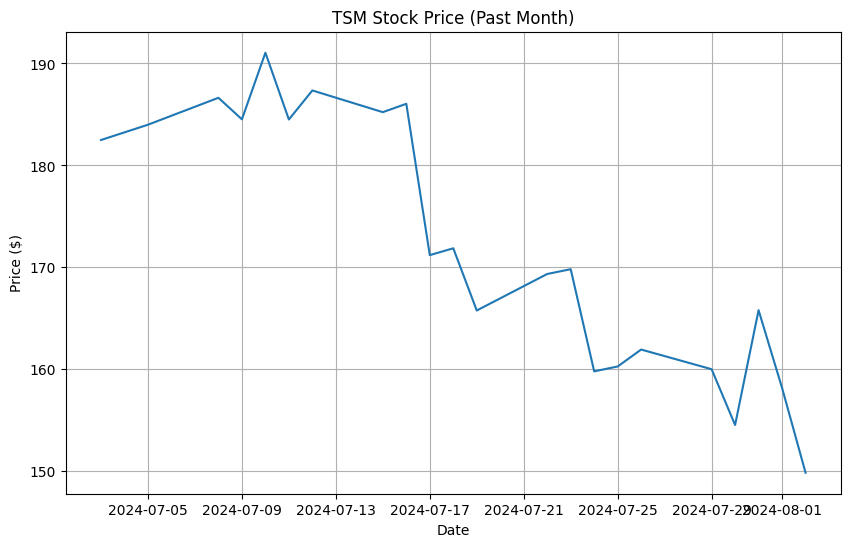

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Get the data for TSM stock
data = yf.download('TSM', period='1mo')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title('TSM Stock Price (Past Month)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.savefig('TSM_Stock_Price.png')
print("The stock price of TSM for the past month has been saved as 'TSM_Stock_Price.png'.")